#**NLP using TensorFlow**
Dataset: https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews

In [ ]:
#Import dataset

import pandas as pd
df = pd.read_csv("/content/spam_ham_dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df = df.drop(['Unnamed: 0', 'label_num'], axis=1)
df = df.rename(columns = {"text" : "Message"})
df = df.rename(columns = {"label" : "Label"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5171 non-null   object
 1   Message  5171 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB


In [ ]:
ctg = pd.get_dummies(df['Label'])
df = pd.concat([df, ctg], axis=1)
df = df.drop(columns='Label')

In [ ]:
df.head()

,Message,ham,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,1,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",1,0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",1,0
3,"Subject: photoshop , windows , office . cheap ...",0,1
4,Subject: re : indian springs\r\nthis deal is t...,1,0


In [ ]:
#panjang data
len(df)

5171

In [ ]:
df.isna().sum()

Message    0
ham        0
spam       0
dtype: int64

In [ ]:
X = df['Message'].values
y = df[['ham','spam']].values

In [ ]:
print(X.shape, y.shape)

(5171,) (5171, 2)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(X) 
 
X = tokenizer.texts_to_sequences(X)
 
X = pad_sequences(X, maxlen=max_len) 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4136, 200) (1035, 200)
(4136, 2) (1035, 2)


In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [ ]:
def model():
    inputs = Input(shape=[max_len])
    layer = Embedding(max_words, 50, input_length=max_len)(inputs)
    layer = LSTM(256, dropout=0.2, recurrent_dropout=0.2)(layer)
    layer = Dense(256)(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(2)(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [ ]:
model = model()
model.compile(loss='categorical_crossentropy',optimizer= RMSprop(),metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 50)           500000    
_________________________________________________________________
lstm (LSTM)                  (None, 256)               314368    
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514   

In [ ]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')==1.0):
      self.model.stop_training = True
      print("\nAkurasi mencapai 100%!")
callbacks = myCallback()

In [ ]:
num_epochs = 200
history = model.fit(X_train, y_train, batch_size=32,
                    epochs=num_epochs, verbose=2,
                    validation_data=(X_test, y_test), callbacks=[callbacks])

Epoch 1/200
130/130 - 127s - loss: 0.2796 - accuracy: 0.8965 - val_loss: 0.1410 - val_accuracy: 0.9440
Epoch 2/200
130/130 - 103s - loss: 0.1540 - accuracy: 0.9729 - val_loss: 0.0711 - val_accuracy: 0.9739
Epoch 3/200
130/130 - 104s - loss: 0.0604 - accuracy: 0.9836 - val_loss: 0.0667 - val_accuracy: 0.9710
Epoch 4/200
130/130 - 104s - loss: 0.0432 - accuracy: 0.9898 - val_loss: 0.0505 - val_accuracy: 0.9826
Epoch 5/200
130/130 - 103s - loss: 0.0327 - accuracy: 0.9932 - val_loss: 0.0609 - val_accuracy: 0.9855
Epoch 6/200
130/130 - 107s - loss: 0.0179 - accuracy: 0.9969 - val_loss: 0.0927 - val_accuracy: 0.9768
Epoch 7/200
130/130 - 107s - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0890 - val_accuracy: 0.9778
Epoch 8/200
130/130 - 103s - loss: 0.0175 - accuracy: 0.9976 - val_loss: 0.3366 - val_accuracy: 0.9720
Epoch 9/200
130/130 - 104s - loss: 0.0127 - accuracy: 0.9978 - val_loss: 0.1095 - val_accuracy: 0.9787
Epoch 10/200
130/130 - 105s - loss: 0.0067 - accuracy: 0.9978 - val_loss:

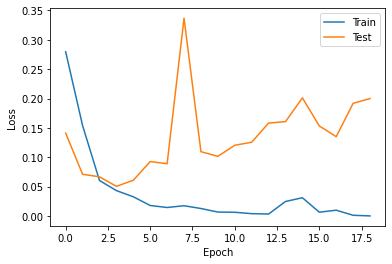

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

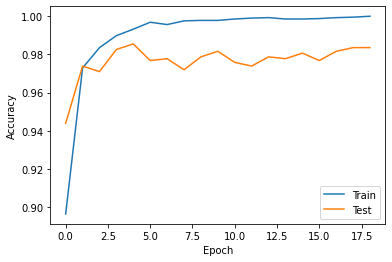

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()